**CURSO**: *Machine Learning* en Geociencias<br />
**Profesor**: Edier Aristizábal (evaristizabalg@unal.edu.co) <br />
**Classroom code**: [wv4cglx]

# 11: Bias - Variance Trade Off

El flujograma de *machine learning* es el arte de crear modelos de una triple selección, una combinación de features, algoritmos, e hiperparámetros que en conjunto identifiquen un modelo ajustado a un conjunto de datos específicos. Para saber si estamos en *overfitting* o en *underfitting* necesitamos los *scores* de entrenamiento y test.

Inicialmente se importan las librerías a utilizar:

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

En este taller se utilizará una de las bases de datos disponible por la librearía Sklearn.datasets, denominada *boston*:

In [2]:
from sklearn.datasets import load_boston
X,y=load_boston(return_X_y=True)
print(X.shape)
print(y.shape)

(506, 13)
(506,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

Tanto la base de datos con los *features*, como la variable objetivo deberán ser divididas en datos para entrenamiento como datos para validación, para lo cual se utilizará la función *train-test-split*, el argumento *random_state* significa que el proceso aleatorio siempre tendra los mismos valores para el número asignado, lo que permitirá obtener los mismos resultados.

In [3]:
X_train,X_test, y_train,y_test = train_test_split(X,y, random_state=1)

A continuacion se implementarán diferentes modelos y se obtendrá para cada uno de ellos el *score* obtenido en los datos de entrenamiento (*train*) y en los datos de validación (*test*), lo cual permitirá conocer si estamos ante un caso de *underfitting* o *overfitting*.

El primer modelo es una Regresión Linear. Como se observa todos los modelos se implementan de la misma forma. Inicialmente se deben instanciar simplemente llamando la función y definiendo los argumentos que se deseen. En este caso se utilizarán los argumentos por defecto por lo tanto no se incluye nada entre los parentesis.

Posteriormente con el modelo instanciado se procede a ajustar los datos al modelo, inicialmente con los datso de entrenamiento.

Cuando se corre el modelo, como salida solo obtenemos la función con los argumentos que por defecto se implementó el modelo.

In [4]:
lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

Finalmente se obtienen los resultados tanto para los datos de entrenamiento como para los datos de validación.

In [5]:
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
print('Train score:', train_score)
print('Test score:', test_score)

Train score: 0.7168057552393374
Test score: 0.7789410172622863


Se obtiene un *score* aceptable tanto para los datos de entrenamiento como los datos de validación, sin embargo con valores mayores para los datos de validación que para los datos de entrenamiento. Lo cual no es muy común.

El siguiente modelo es la regresión con vecino mas cercano (KNN)

In [6]:
kn = KNeighborsRegressor()
kn.fit(X_train, y_train)

KNeighborsRegressor()

In [7]:
train_score=kn.score(X_train, y_train)
test_score=kn.score(X_test, y_test)
print('Train score:', train_score)
print('Test score:', test_score)

Train score: 0.6667843569655112
Test score: 0.5281871748119744


Los resultados señalan un pobre ajuste, tanto para los datos de entrenamiento como los datos de validación, por lo tanto estamos ante un sub-ajuste del modelo (*bias*). Es decir el modelo no se ajusta adecuadamente a los datos.

# Curva de aprendizaje (*Learning curve*)

La curva de aprendizaje permite visualizar el efecto del número de observaciones en el desempeño del modelo. Generalmente se utiliza con los datos de entrenamiento y con los datos de validación para determinar si el modelo se subajusta o sobreajusta a los datos. 

En este caso se trabajará para la selección de los datos de entrenamiento y validación con *cross validation*, razón por la cual en la función de *learning_curve* se debe adicionar no solo el modelo a utilizar y los datos, sino ademas el número de subgrupos en los cuales se dividirán los datos para correr el modelo, en este caso 5.

In [30]:
from sklearn.model_selection import learning_curve

lc = learning_curve(KNeighborsRegressor(n_neighbors=5),X_train,y_train,cv=5)
samples, train, test = lc[0], lc[1], lc[2]
lc

(array([ 30,  98, 166, 234, 303]),
 array([[0.56933782, 0.46862284, 0.46862284, 0.46862284, 0.46862284],
        [0.64042297, 0.42752721, 0.4553971 , 0.4553971 , 0.4553971 ],
        [0.58762063, 0.52072386, 0.50225305, 0.56477691, 0.56477691],
        [0.66218149, 0.58212633, 0.57309331, 0.59936272, 0.6012856 ],
        [0.69047779, 0.64294673, 0.64638688, 0.61497593, 0.61809588]]),
 array([[0.07523979, 0.25640149, 0.46076537, 0.05857367, 0.25929068],
        [0.07499979, 0.36548497, 0.2548355 , 0.02084983, 0.23898893],
        [0.09770108, 0.44973113, 0.4278561 , 0.2277862 , 0.34198192],
        [0.16966408, 0.50761421, 0.46420491, 0.3003555 , 0.2836421 ],
        [0.16641073, 0.48497436, 0.46632192, 0.40836736, 0.48833828]]))

Como observamos anteriormente, como resultado se obtiene un vector con el número de observaciones, una primera matriz con los resultados del modelo para los datos de entrenamiento. Por cada número de observaciones se obtienen 5 resultados que corresponden a cada subgrupo de la validación cruzada. y la segunda matriz corresponde a los mismos resultados pero para los datos de validación.

Para observar los resultados gráficamente se obtiene el valor medio para cada subconjunto de datos.

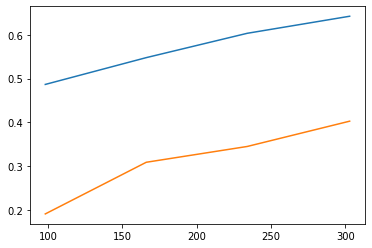

In [31]:
plt.plot(samples[1:],np.mean(train,axis=1)[1:])
plt.plot(samples[1:],np.mean(test,axis=1)[1:]);

Los resultados señalan un grave problema de *overfitting* del modelo.

A continuacion se presentará otro ejemplo utilizando el modelo *naive-bayes* y para la división de los datos *ShuffleSplit*. Para este caso se utiliza la base de datos *Iris*, la cual es un problema de clasificación.

In [20]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import ShuffleSplit

In [21]:
from sklearn.datasets import load_iris
X,y=load_iris(return_X_y=True)
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [24]:
estimator = GaussianNB()
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=4, train_sizes=np.linspace(.1, 1.0, 5))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

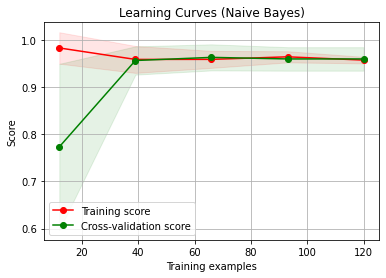

In [25]:
plt.figure()
plt.title("Learning Curves (Naive Bayes)")    
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1,color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best");

Los resultados anteriores señalan un buen ajuste tanto para los datos de entrenamiento y validación. Las dos curvas convergen rápidamente lo cual significa que la varianza se reduce.

A continuacion se implementa el modelo de *Support vector Machine* tipo casificador.

In [ ]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=4, train_sizes=train_sizes)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

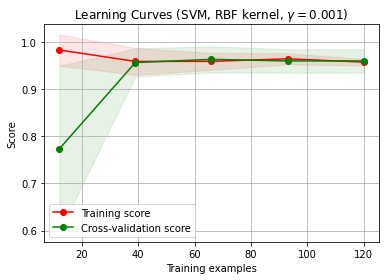

In [26]:
plt.figure()
plt.title(r"Learning Curves (SVM, RBF kernel, $\gamma=0.001$)")    
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1,color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best");

A continuacion se implementa el modelo de *Random Forests*

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve

In [ ]:
digits = load_digits()
X, y = digits.data, digits.target

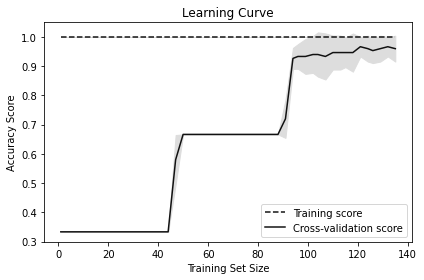

In [29]:
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(), X, y,cv=10, scoring='accuracy', n_jobs=-1,train_sizes=np.linspace(0.01, 1.0, 50))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()

En el caso anterior se observa un adecuado comportamiento del modelo con los datos de entrenamiento, el cual se reduce el desempeño pero ligeramente, mientras que con los datos de validación el ajuste del modelo incrementa rápidamente, sin embargo al final se observa un ligero problema de varianza, el cual podría resolverse con mas datos de entrenamiento, ya que la curva de aprendizaje para los datos de validación sigue aumentando.

## Como solucionar el overfitting y el underfitting?

### Viarianza Alta:
- Conseguir más ejemplos
- Reducir cantidad de features
- Aumentar coeficiente de regularización

### Bias Alto:
- Más features
- Modelo más complejo
- Mal resultado general:
- Probar otro algoritmo/familia de modelos, quizás las hipotesis del modelo no son cumplidas por tu dataset